In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Applying Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Repeating it with KNN and DT
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Cross validation and RF
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# Plotting the models against measures
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.inspection import permutation_importance

In [2]:
df = pd.read_csv('Credit.csv').drop(['Unnamed: 0'], axis=1)
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [3]:


df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Student'] = LabelEncoder().fit_transform(df['Student'])
df['Married'] = LabelEncoder().fit_transform(df['Married'])
df['Ethnicity'] = LabelEncoder().fit_transform(df['Ethnicity'])

### a
X = df.drop(['Income'], axis=1)
y = df['Income'].apply(lambda x: 1 if x > 50 else 0)

# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=500)
clf.fit(X_train_scaled, y_train)

# Prediction
y_pred = clf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %) for Income > 50:", acc * 100)

Logistic Regression model accuracy (in %) for Income > 50: 97.5


In [4]:
# Doing regression with Logistic regression ? pfft.

# ### b
# X = df.drop(['Cards'], axis=1)
# y = df['Cards']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit(X_test)

# # LogisticRegression
# clf = LogisticRegression(random_state=0, max_iter=500)
# clf.fit(X_train_scaled, y_train)

# # Prediction
# y_pred = clf.predict(X_test_scaled)

# acc = accuracy_score(y_test, y_pred)
# print("Logistic Regression model accuracy (in %) for no. of Cards: ", acc * 100);

In [5]:


### a
X = df.drop(['Income'], axis=1)
y = df['Income'].apply(lambda x: 1 if x > 50 else 0)

# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN model accuracy (in %):", acc_knn * 100)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree model accuracy (in %):", acc_dt * 100)

KNN model accuracy (in %): 81.25
Decision Tree model accuracy (in %): 85.0


In [6]:
### b
X = df.drop(['Cards'], axis=1)
y = df['Cards']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN model accuracy (in %):", acc_knn * 100)

dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree model accuracy (in %):", acc_dt * 100)

KNN model accuracy (in %): 22.5
Decision Tree model accuracy (in %): 20.0


In [7]:
### a
X = df.drop(['Income'], axis=1)
y = df['Income'].apply(lambda x: 1 if x > 50 else 0)

# Define the models
models = [('Logistic Regression', LogisticRegression(random_state=0, max_iter=500)),
          ('KNN', KNeighborsClassifier(n_neighbors=3)),
          ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
          ('Random Forest', RandomForestClassifier(max_depth=5, random_state=0))]

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize a dictionary to hold accuracies
accuraciesA = {name: [] for name, _ in models}

# Cross-validation
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # For each model
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = model.predict(X_test)
        
        # Calculate the accuracy
        acc = accuracy_score(y_test, y_pred)
        
        # Store the accuracy
        accuraciesA[name].append(acc)

# Print the average accuracy for each model
for name, accs in accuraciesA.items():
    print(f'Average accuracy of {name}: {np.mean(accs)}')


Average accuracy of Logistic Regression: 0.9475
Average accuracy of KNN: 0.7375
Average accuracy of Decision Tree: 0.9149999999999998
Average accuracy of Random Forest: 0.8675


In [8]:
### b
X = df.drop(['Cards'], axis=1)
y = df['Cards']

# Define the models
models = [('Logistic Regression', LogisticRegression(random_state=0, max_iter=500)),
          ('KNN', KNeighborsClassifier(n_neighbors=3)),
          ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
          ('Random Forest', RandomForestClassifier(max_depth=5, random_state=0))]

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize a dictionary to hold accuracies
accuraciesB = {name: [] for name, _ in models}

# Cross-validation
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # For each model
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = model.predict(X_test)
        
        # Calculate the accuracy
        acc = accuracy_score(y_test, y_pred)
        
        # Store the accuracy
        accuraciesB[name].append(acc)

# Print the average accuracy for each model
for name, accs in accuraciesB.items():
    print(f'Average accuracy of {name}: {np.mean(accs)}')

Average accuracy of Logistic Regression: 0.265
Average accuracy of KNN: 0.24250000000000002
Average accuracy of Decision Tree: 0.27
Average accuracy of Random Forest: 0.265


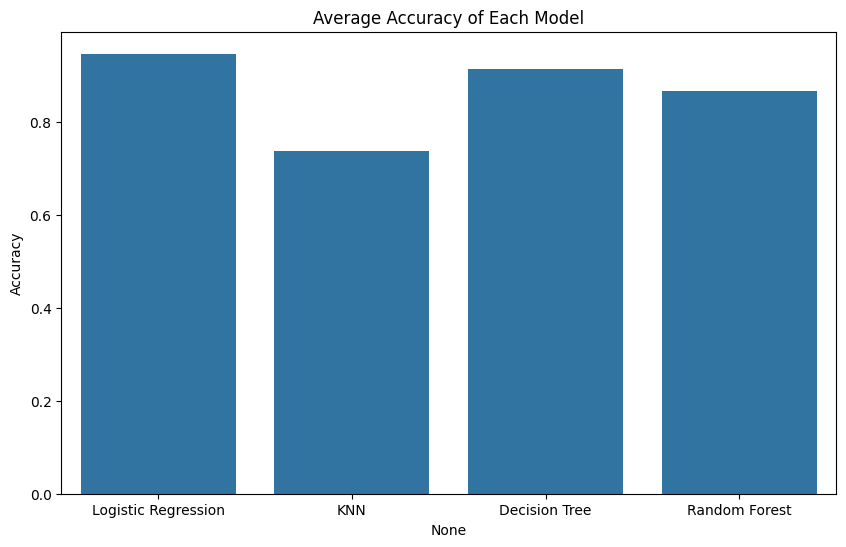

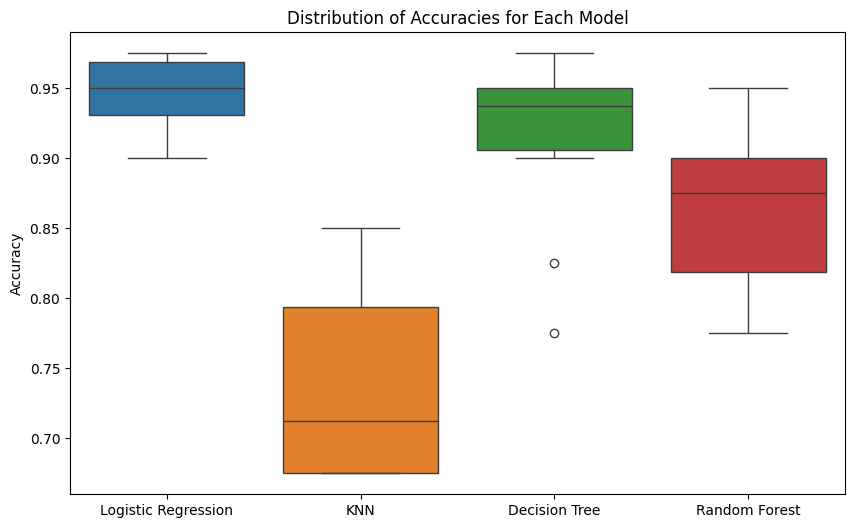

In [9]:
# a
acc_df = pd.DataFrame(accuraciesA)

# Create a bar plot of the average accuracies
avg_acc = acc_df.mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_acc.index, y=avg_acc.values)
plt.title('Average Accuracy of Each Model')
plt.ylabel('Accuracy')
plt.show()

# Create box plots of the accuracies
plt.figure(figsize=(10, 6))
sns.boxplot(data=acc_df)
plt.title('Distribution of Accuracies for Each Model')
plt.ylabel('Accuracy')
plt.show()

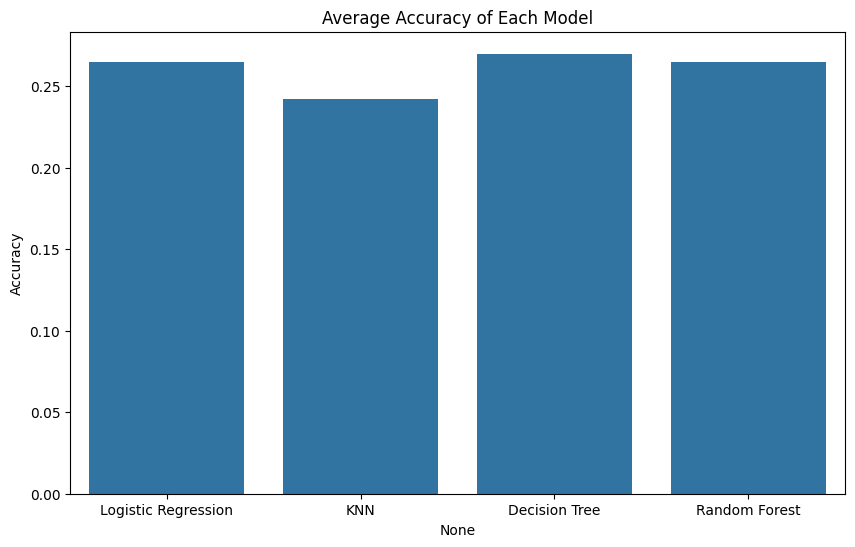

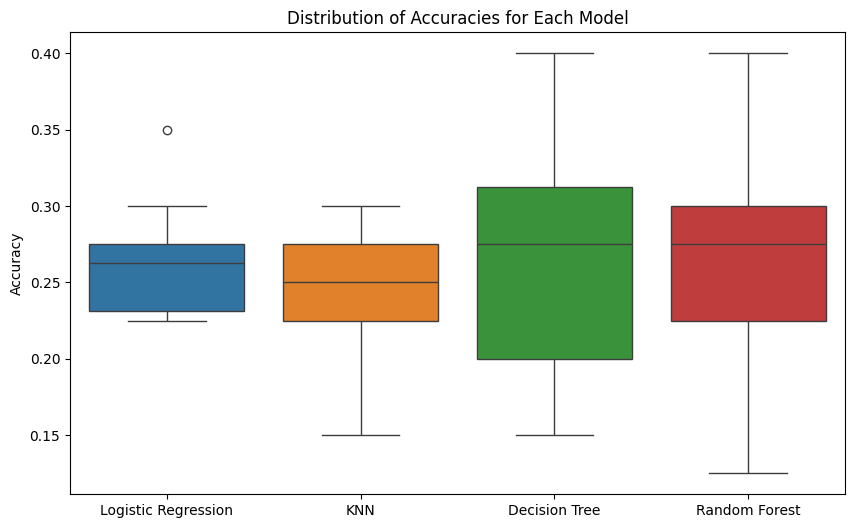

In [10]:
# b
acc_df = pd.DataFrame(accuraciesB)

# Create a bar plot of the average accuracies
avg_acc = acc_df.mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_acc.index, y=avg_acc.values)
plt.title('Average Accuracy of Each Model')
plt.ylabel('Accuracy')
plt.show()

# Create box plots of the accuracies
plt.figure(figsize=(10, 6))
sns.boxplot(data=acc_df)
plt.title('Distribution of Accuracies for Each Model')
plt.ylabel('Accuracy')
plt.show()

The measures on 'a' with Logistic Regression


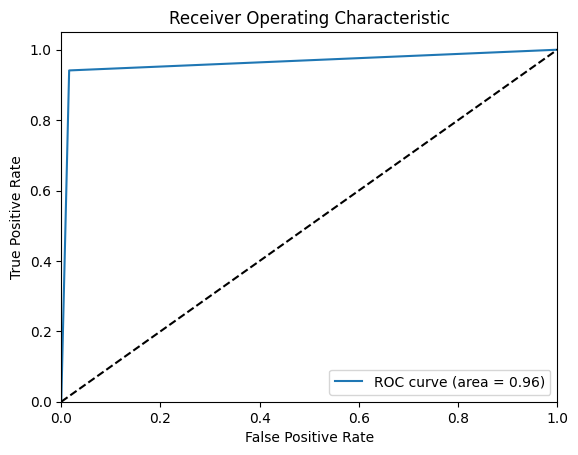

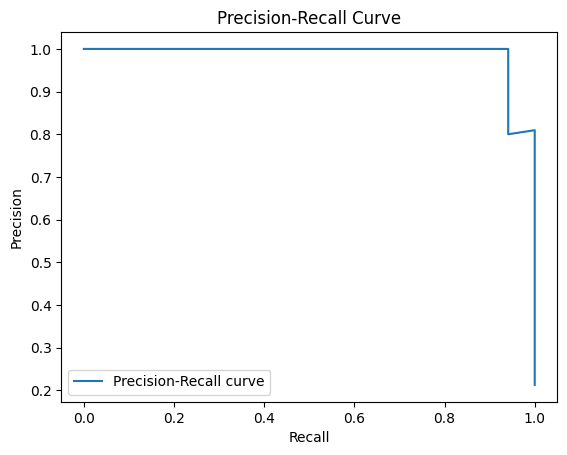

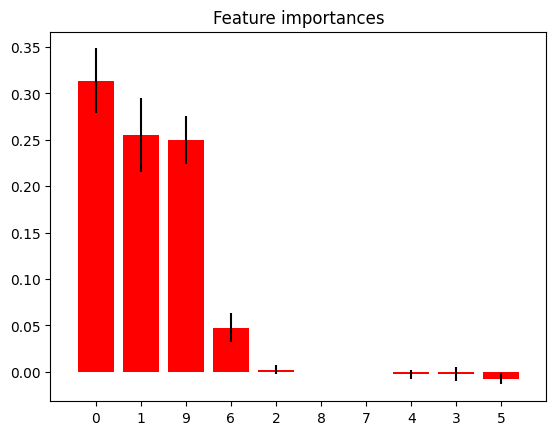

The measures on 'a' with KNN


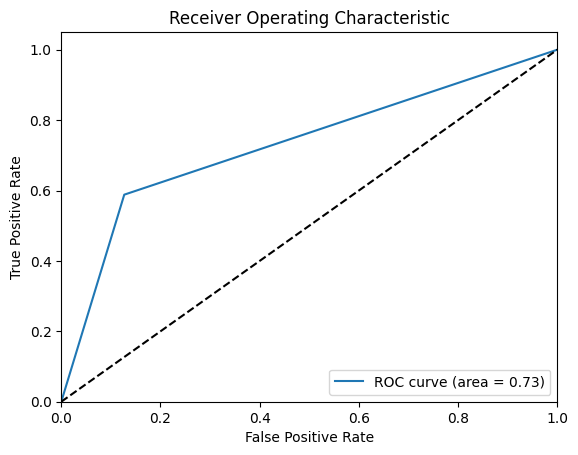

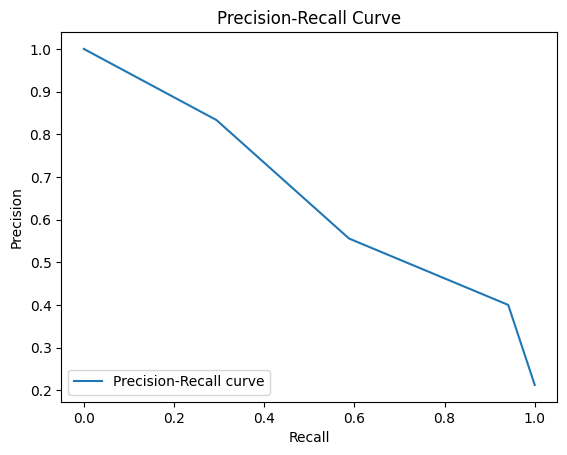

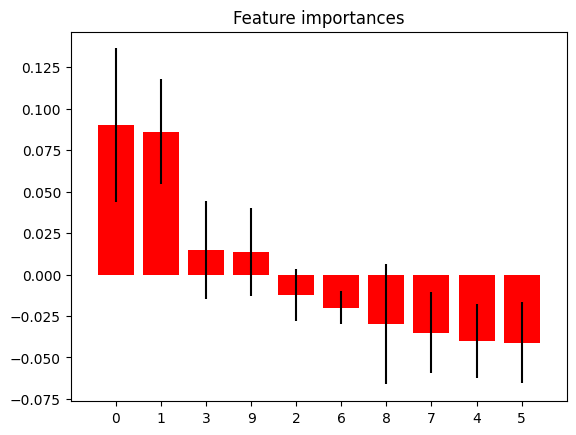

The measures on 'a' with Decision Tree


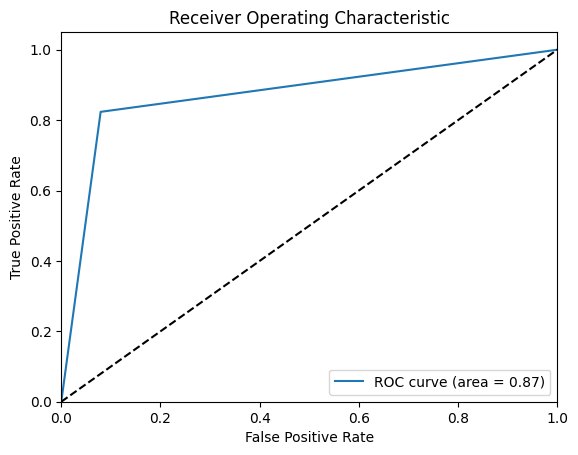

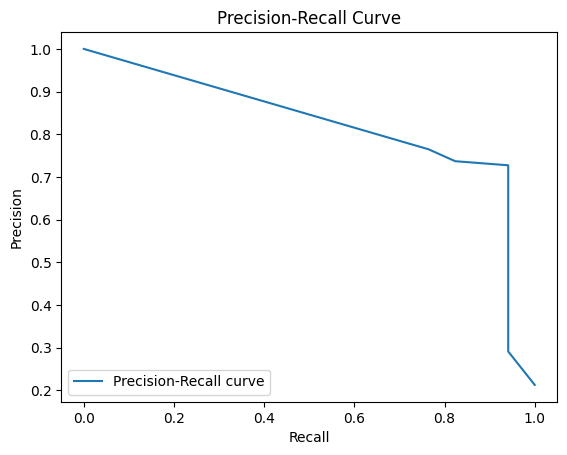

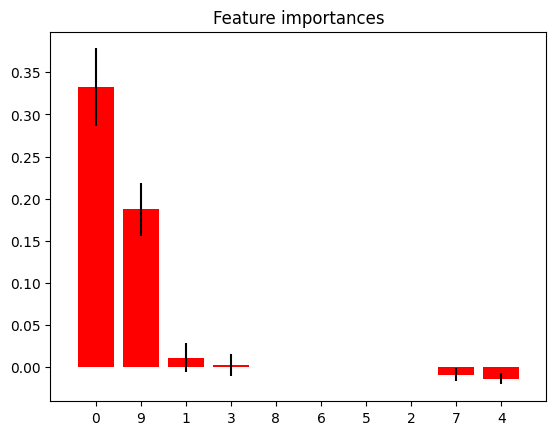

The measures on 'a' with Random Forest


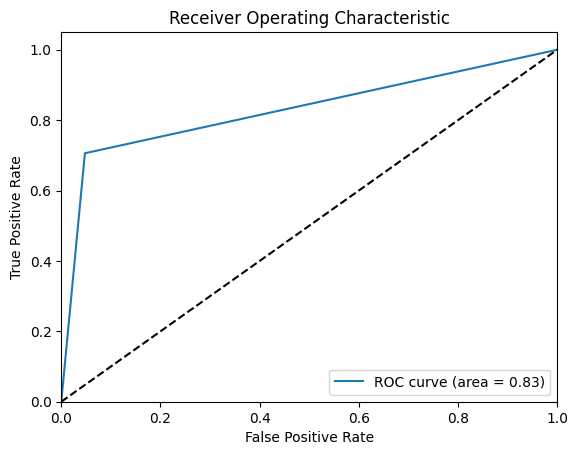

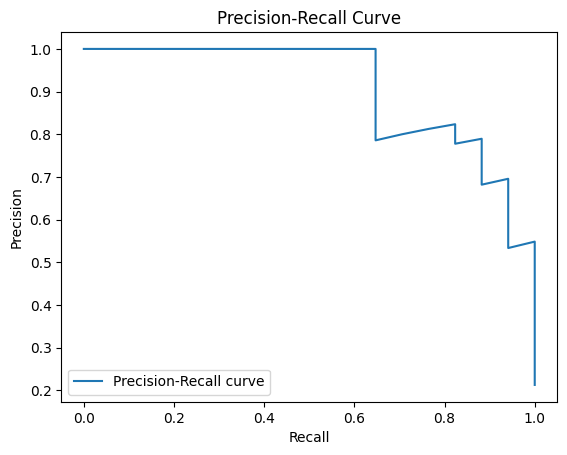

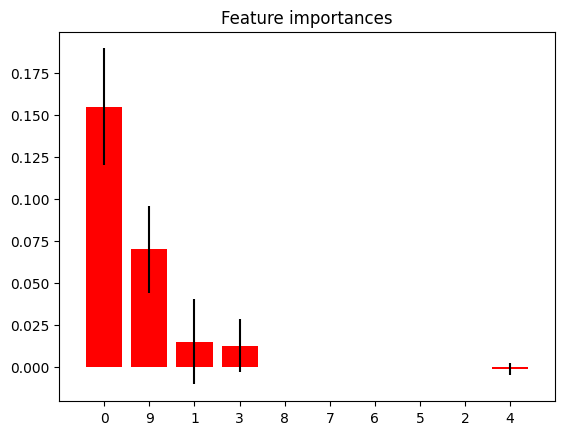

In [11]:
### a
X = df.drop(['Income'], axis=1)
y = df['Income'].apply(lambda x: 1 if x > 50 else 0)

# Define the models
models = [('Logistic Regression', LogisticRegression(random_state=0, max_iter=500)),
          ('KNN', KNeighborsClassifier(n_neighbors=3)),
          ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
          ('Random Forest', RandomForestClassifier(max_depth=5, random_state=0))]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


for name, model in models:
       print("The measures on 'a' with", name)
       model.fit(X_train_scaled, y_train)
       
       # ROC curve
       fpr, tpr, _ = roc_curve(y_test, model.predict(X_test_scaled))
       roc_auc = auc(fpr, tpr)

       plt.figure()
       plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
       plt.plot([0, 1], [0, 1], 'k--')
       plt.xlim([0.0, 1.0])
       plt.ylim([0.0, 1.05])
       plt.xlabel('False Positive Rate')
       plt.ylabel('True Positive Rate')
       plt.title('Receiver Operating Characteristic')
       plt.legend(loc="lower right")
       plt.show()

       # Precision-Recall curve
       precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])

       plt.figure()
       plt.plot(recall, precision, label='Precision-Recall curve')
       plt.xlabel('Recall')
       plt.ylabel('Precision')
       plt.title('Precision-Recall Curve')
       plt.legend(loc="lower left")
       plt.show()

       # Feature importance plot
       importances = permutation_importance(model, X_test_scaled, y_test, n_repeats=10)
       indices = np.argsort(importances.importances_mean)[::-1]

       plt.figure()
       plt.title("Feature importances")
       plt.bar(range(X.shape[1]), importances.importances_mean[indices],
              color="r", yerr=importances.importances_std[indices], align="center")
       plt.xticks(range(X.shape[1]), indices)
       plt.xlim([-1, X.shape[1]])
       plt.show()

In [12]:
### b
X = df.drop(['Cards'], axis=1)
y = df['Cards']

# Define the models
models = [
       ('Logistic Regression', LogisticRegression(random_state=0, max_iter=500)),
          ('KNN', KNeighborsClassifier(n_neighbors=3)),
          ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
          ('Random Forest', RandomForestClassifier(max_depth=5, random_state=0))
          ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


for name, model in models:
       print("The measures on 'b' with", name)
       model.fit(X_train_scaled, y_train)
       
       # ROC curve
       fpr, tpr, _ = roc_curve(y_test, model.predict(X_test_scaled))
       roc_auc = auc(fpr, tpr)

       plt.figure()
       plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
       plt.plot([0, 1], [0, 1], 'k--')
       plt.xlim([0.0, 1.0])
       plt.ylim([0.0, 1.05])
       plt.xlabel('False Positive Rate')
       plt.ylabel('True Positive Rate')
       plt.title('Receiver Operating Characteristic')
       plt.legend(loc="lower right")
       plt.show()

       # Precision-Recall curve
       precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])

       plt.figure()
       plt.plot(recall, precision, label='Precision-Recall curve')
       plt.xlabel('Recall')
       plt.ylabel('Precision')
       plt.title('Precision-Recall Curve')
       plt.legend(loc="lower left")
       plt.show()

       # Feature importance plot
       importances = permutation_importance(model, X_test_scaled, y_test, n_repeats=10)
       indices = np.argsort(importances.importances_mean)[::-1]

       plt.figure()
       plt.title("Feature importances")
       plt.bar(range(X.shape[1]), importances.importances_mean[indices],
              color="r", yerr=importances.importances_std[indices], align="center")
       plt.xticks(range(X.shape[1]), indices)
       plt.xlim([-1, X.shape[1]])
       plt.show()

The measures on 'b' with Logistic Regression


ValueError: multiclass format is not supported